In [8]:
# %%file importMag.py
import numpy as np
import matplotlib.pyplot as plt
# import warnings
# warnings.filterwarnings('ignore') # ignore warnings: only use this once you are sure things are working
from IPython.html.widgets import *
from fatiando import utils, mesher, gridder
import fatiando.gravmag.prism as prism


%matplotlib inline

In [9]:
x1, x2 = -5., 5.
y1, y2 = -5., 5.
z1, z2 = 5., 10.
inc, dec = 0.,0.
p = mesher.Prism(x1, x2, y1, y2, z1, z2,{'magnetization': utils.ang2vec(10, inc, dec)})

In [16]:
shape = (100,100)
xp, yp, zp = gridder.regular((-100., 100, -100, 100),(100,100), z=0)

In [18]:
tf = prism.tf(xp,yp,zp,[p],10.,0.)

array([[ 0.08950594,  0.09776882,  0.10656595, ...,  0.10656595,
         0.09776882,  0.08950594],
       [ 0.08678018,  0.09518878,  0.10416046, ...,  0.10416046,
         0.09518878,  0.08678018],
       [ 0.08368805,  0.09222876,  0.10136203, ...,  0.10136203,
         0.09222876,  0.08368805],
       ..., 
       [ 0.07639181,  0.08453923,  0.09325784, ...,  0.09325784,
         0.08453923,  0.07639181],
       [ 0.07969638,  0.08773104,  0.09630905, ...,  0.09630905,
         0.08773104,  0.07969638],
       [ 0.08263147,  0.09053896,  0.0989625 , ...,  0.0989625 ,
         0.09053896,  0.08263147]])

<matplotlib.colorbar.Colorbar instance at 0x107cec488>

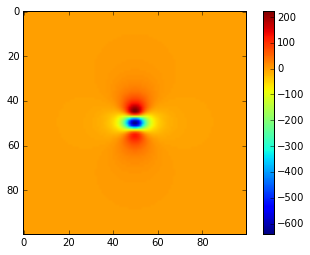

In [21]:
plt.colorbar(plt.imshow(tf.reshape(shape)))

(1,)